## 权重衰减（L2 正则化）
#### 动手学深度学习 —— 权重衰减（L2 正则化）
#### 使用 Pytorch 实现——yujia

In [75]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
import random
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

#### 造数据

In [76]:
n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = np.ones((num_inputs, 1)) * 0.01, 0.05

In [77]:
features = np.random.normal(size=(n_train + n_test, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(scale=0.01, size=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train, :], labels[n_train:, :]
train_features = torch.from_numpy(train_features)
test_features = torch.from_numpy(test_features)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

In [83]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.x = features
        self.y = labels
        self.len = len(self.x)
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
train_set = MyDataset(train_features, train_labels)
test_set = MyDataset(test_features, test_labels)

In [84]:
batch_size = 1
num_workers = 0
train_iter = DataLoader(
    dataset = train_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = True
)
test_iter = DataLoader(
    dataset = test_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = True
)
for X, y in train_iter:
    print(X.shape)
    break

torch.Size([1, 200])


#### 定义网络

In [85]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear_net = nn.Sequential(
            nn.Linear(200, 1)
        )
    def forward(self, x):
        x = self.linear_net(x)
        return x
model = Net()

In [89]:
def NetInit(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
model.apply(NetInit).double()

Net(
  (linear_net): Sequential(
    (0): Linear(in_features=200, out_features=1, bias=True)
  )
)

In [90]:
loss = torch.nn.MSELoss()
lr = 0.03
num_epochs = 100

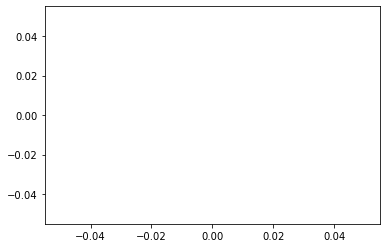

In [93]:
def fit_and_plot(wd):
    trainer_w = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=wd)
    trainer_b = torch.optim.SGD(model.parameters(), lr=lr)
    train_ls, test_ls = [], []
    for epoch in range(1, num_epochs+1):
        for step, (X, y) in enumerate(train_iter):
            l = loss(model(X), y)
            l.backward()
            trainer_w.step()
            trainer_b.step()
        train_ls.append(loss(model(train_features), train_labels).mean())
        test_ls.append(loss(model(test_features), test_labels).mean())
    fig, ax = plt.subplots()
    x = np.linspace(1, num_epochs+1, 100)
    y1 = train_ls
    ax.plot(x, y1, label='train')
fit_and_plot(0)